# Loading Data From CSV file

In [4]:
import pandas as pd
import numpy as np

In [5]:
df2 = pd.read_csv("C:\\Users\\HP\\Downloads\\daily-total-female-births-CA.xls",header=0)

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [62]:
df2.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [7]:
df2['date'].dtype

dtype('O')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [9]:
df2=pd.read_csv("C:\\Users\\HP\\Downloads\\daily-total-female-births-CA.xls",parse_dates=[0])

In [10]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [11]:
df2['date'].dtype  # <M8[ns] ek NumPy/Pandas ka data type hai jo datetime64 ko represent karta hai nanosecond precision ke sath.

dtype('<M8[ns]')

In [12]:
series=pd.read_csv("C:\\Users\\HP\\Downloads\\daily-total-female-births-CA.xls",header=0,parse_dates=[0],index_col=0).squeeze("columns")
series

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

In [13]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [14]:
series.shape

(365,)

In [15]:
df2.shape

(365, 2)

In [16]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [17]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive

In [18]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [19]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [20]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [21]:
features = df2.copy()

In [22]:
features['year'] = df2['date'].dt.year

In [23]:
features['year'] = df2['date'].dt.month

In [24]:
features['year'] = df2['date'].dt.day

In [25]:
features.head(5)

,date,births,year
0,1959-01-01,35,1
1,1959-01-02,32,2
2,1959-01-03,30,3
3,1959-01-04,31,4
4,1959-01-05,44,5


# Lag Faetures

In [26]:
features['lag2'] = df2['births'].shift(2)

In [27]:
features['lag2'] = df2['births'].shift(365)

In [28]:
features.head()

,date,births,year,lag2
0,1959-01-01,35,1,NaN
1,1959-01-02,32,2,NaN
2,1959-01-03,30,3,NaN
3,1959-01-04,31,4,NaN
4,1959-01-05,44,5,NaN


# window features

In [29]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [30]:
features.head(5)

,date,births,year,lag2,Roll_mean
0,1959-01-01,35,1,NaN,NaN
1,1959-01-02,32,2,NaN,33.5
2,1959-01-03,30,3,NaN,31.0
3,1959-01-04,31,4,NaN,30.5
4,1959-01-05,44,5,NaN,37.5


In [31]:
features['Roll_mean'] = df2['births'].rolling(window = 3).max()

In [32]:
features.head(5)

,date,births,year,lag2,Roll_mean
0,1959-01-01,35,1,NaN,NaN
1,1959-01-02,32,2,NaN,NaN
2,1959-01-03,30,3,NaN,35.0
3,1959-01-04,31,4,NaN,32.0
4,1959-01-05,44,5,NaN,44.0


# expanding features

In [33]:
features["Expand_max"]=df2['births'].expanding().max()

In [34]:
features.head(10)

,date,births,year,lag2,Roll_mean,Expand_max
0,1959-01-01,35,1,NaN,NaN,35.0
1,1959-01-02,32,2,NaN,NaN,35.0
2,1959-01-03,30,3,NaN,35.0,35.0
3,1959-01-04,31,4,NaN,32.0,35.0
4,1959-01-05,44,5,NaN,44.0,44.0
5,1959-01-06,29,6,NaN,44.0,44.0
6,1959-01-07,45,7,NaN,45.0,45.0
7,1959-01-08,43,8,NaN,45.0,45.0
8,1959-01-09,38,9,NaN,45.0,45.0
9,1959-01-10,27,10,NaN,43.0,45.0


# downsampling and upsampling

In [40]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",header= 0,parse_dates =[0])

In [41]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


# DOWNSAMPLING

In [42]:
quarterly_miles_df= miles_df.resample('Q', on='Month').mean()

In [46]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [43]:
yearly_miles_df= miles_df.resample('Y', on='Month').sum()

In [47]:
yearly_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [50]:
upsampled_miles_df= miles_df.resample('D', on='Month').mean()

In [51]:
upsampled_miles_df.head()

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN


In [53]:
interpolated_miles_df= upsampled_miles_df.interpolate(method='linear')

In [54]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [55]:
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
Dataviz_df = df2.copy()

In [58]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<Axes: >

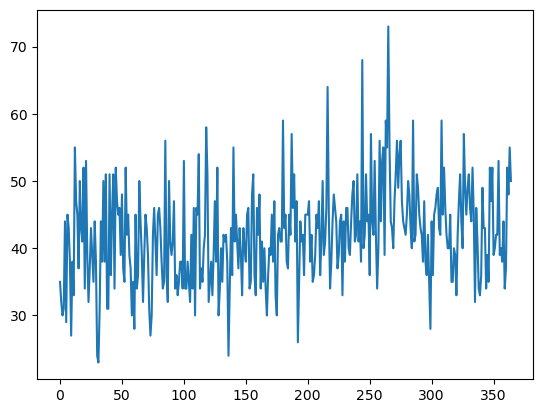

In [61]:
Dataviz_df['births'].plot()

In [63]:
Dataviz_df.index=Dataviz_df['date']

<Axes: xlabel='date'>

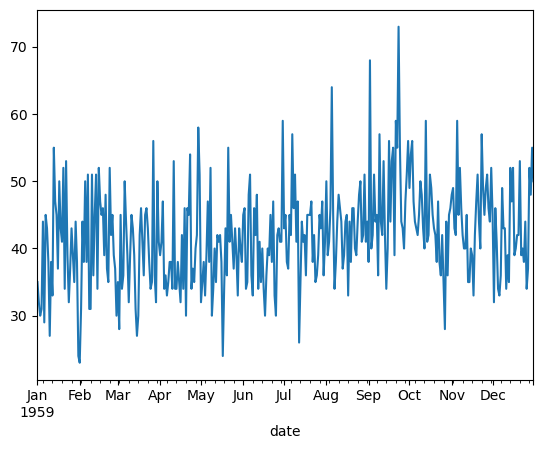

In [64]:
Dataviz_df['births'].plot()

# Zooming In

In [65]:
Dataviz_df2= Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <'1959-01-10')].copy()

In [67]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


In [69]:
Dataviz_df2.index=Dataviz_df2['date']

<Axes: xlabel='date'>

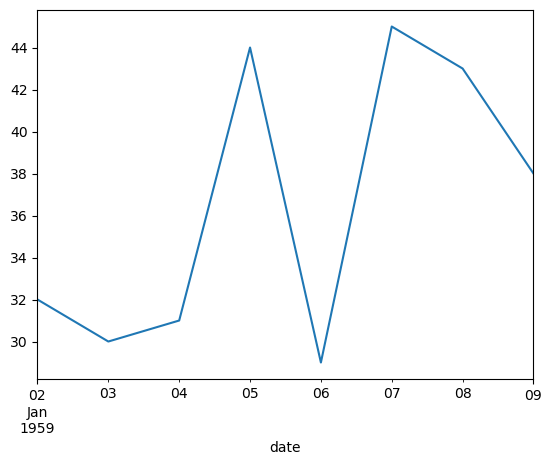

In [70]:
Dataviz_df2['births'].plot()

# TrendLine

In [71]:
import seaborn as sns

<Axes: ylabel='births'>

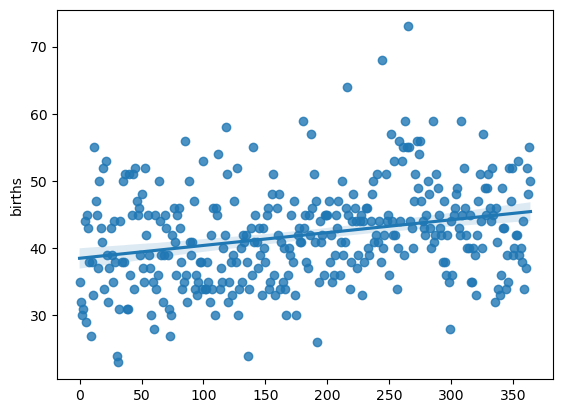

In [72]:
sns.regplot(x=df2.index.values, y=df2['births'])

<Axes: ylabel='births'>

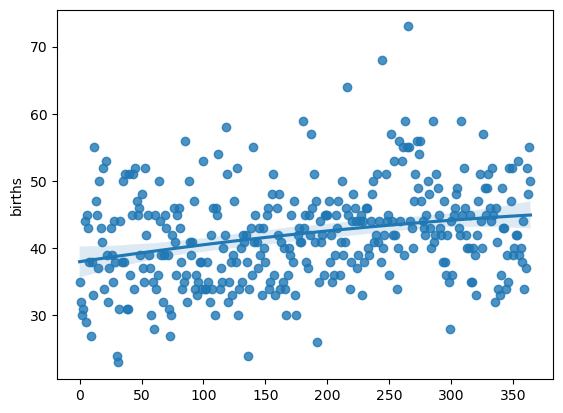

In [73]:
sns.regplot(x=df2.index.values, y=df2['births'],order=2)